참고링크: https://sumniya.tistory.com/4, https://jeinalog.tistory.com/20, http://blog.quantylab.com/rl.html, https://m.blog.naver.com/hongjg3229/221590282094, https://apincan.tistory.com/41, https://passi0n.tistory.com/86, https://engineering-ladder.tistory.com/68, https://mobicon.tistory.com/539    
#### 강화학습
   - tabular 방식  
   - deep learning 방식
     - q-value 구하는 것을 딥러닝과 결합한 것이 DQN(=딥러닝을 통해 q-vaule값을 approximate함)
     > q-value란?  
     > = 최종적으로 받는 모든 보상의 총합  
     > <img src="https://user-images.githubusercontent.com/47767202/106096240-81685400-6178-11eb-8cb8-e7eae1e050d1.png" width="30%">  

이 외의 강화학습 용어 참고: https://namu.wiki/w/%EA%B0%95%ED%99%94%ED%95%99%EC%8A%B5/%EC%9A%A9%EC%96%B4

#### frozen lake
OpenAI gym에서 제공하는 강화학습 환경 중 하나. 다른 종류로는 cartPole이 있음.  
<img src="https://user-images.githubusercontent.com/47767202/106099841-ae1f6a00-617e-11eb-9e18-92b8ae4b5b5d.png" width="30%">
   - environment는 4*4 모양의 언 호수
   - state는 start / goal / safe-frozen / dangerous hole  
   - action은 up / left / down / right
   - reward는 1(goal state일때) 또는 0(그 외 나머지 경우)
   - \+ agent는 environment를 모르는 상태

### -----------------------------------------------------------

출처: https://passi0n.tistory.com/86  
<img src="https://user-images.githubusercontent.com/47767202/106238698-a9bd8480-6244-11eb-940a-0d40eea7d159.png" width="80%">  

- tabular방식 = q-table

---------

출처: https://sumniya.tistory.com/4
<img src="https://user-images.githubusercontent.com/47767202/106241851-10916c80-624a-11eb-9d4a-ece7dcea58ba.png" width="80%">

- q-table에서 neural network이용한게 q-net

--------

출처: https://sumniya.tistory.com/19
<img src="https://user-images.githubusercontent.com/47767202/106242145-92819580-624a-11eb-9a25-98586a6c82da.png" width="80%">

- q-net에서 딥러닝적용한게 DQN

------

출처: https://mclearninglab.tistory.com/64
<img src="https://user-images.githubusercontent.com/47767202/106245696-3b7ebf00-6250-11eb-8582-0a0cffffee94.png" width="80%">

- __Q: tabular 방식은 model-free의 q-learning방식?? or 그냥 따로 봐야하는건지??__
    - 답: 

### 1. tabular방식 + frozen lake 환경
코드참고링크: https://sumniya.tistory.com/4  
설명참고링크: https://www.youtube.com/watch?v=MQ-3QScrFSI

In [1]:
import gym
import numpy as np

In [2]:
env=gym.make('FrozenLake-v0')

In [4]:
#Initialize table with all zeros
Q = np.zeros([env.observation_space.n, env.action_space.n])

In [5]:
Q

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

Q -Table of FrozenLake env. has a 16 X 4 grid of shape. (one for each block : 16) X (Action : 4) // up, down, left or right

In [6]:
# 얘는 잠깐 보여주기용
observation = env.reset()
env.render() # render = 환경을 화면으로 출력해줌
print('------------------------')
for i in range(env.action_space.n):
    action = i
    observation, reward, done, info = env.step(action)
    env.render()
    print('action: %d' %action) # 0: left, 1: down, 2: right, 3: up
    print('state : %d \ninfo : %.3f' %(observation,info['prob']))
    print('------------------------')
    observation = env.reset()


SFFF
FHFH
FFFH
HFFG
------------------------
  (Left)
SFFF
FHFH
FFFH
HFFG
action: 0
state : 4 
info : 0.333
------------------------
  (Down)
SFFF
FHFH
FFFH
HFFG
action: 1
state : 4 
info : 0.333
------------------------
  (Right)
SFFF
FHFH
FFFH
HFFG
action: 2
state : 1 
info : 0.333
------------------------
  (Up)
SFFF
FHFH
FFFH
HFFG
action: 3
state : 0 
info : 0.333
------------------------


is_slippery=True
- frozen lake라는 환경은 바람도 많이 불고 빙판길을 걸어가다가 미끄러질 수 있는 변수가 많은 환경이기 때문에, agent는 자신이 원하는 곳으로 마음껏 갈 수 있는 것이 아니다.  
= stochastic model이다. 
[이에 관한 설명 링크](https://apincan.tistory.com/41)


- -> Q-table을 갱신할 때 새로운 Q값(즉각적인 보상과 다음 상태에서 얻을 수 있는 최대 보상의 합)보다 기존에 구했던 Q값을 더 신뢰하는 방법을 채택

In [7]:
# Set learning parameters
lr = .8   # learning rate: 값이 크게 줄을수록 학습 속도가 빨라짐
y = .95   # discount factor
num_episodes = 2000

#create lists to contain total rewards and steps per episode
rList = [] # reword list
# sList = [] # state list

In [8]:
for i in range(num_episodes):
    s = env.reset() # Reset environment and get first new observation
    rAll = 0        # total reward
    d = False       # end of precess
    j = 0           # step
#     print('------<initial state>-------')
#     env.render()
#     print('state : %d \ninfo : %.3f' %(s,info['prob']))
#     print('----------------------------')
    #The Q-Table learning algorithm
    while j < 100:
        j+=1
        
        # Choose an action by greedily (with noise) picking from Q table
        # 1/ (i+1) factor has the effect of cutting back on randomness
        a = np.argmax(Q[s,:] + np.random.randn(1,env.action_space.n)*(1./(i+1)))  
        # 원래식은 a = np.armax(Q[s,:])
        # -> 한번 Q-table이 완성되고 나면 항상 같은 루트로만 이동하는 문제점
        # -> 아직 가보지 않은 더 최적화된 루트를 찾기 위해 랜덤노이즈 이용
        
        #Get new state and reward of action an agent did from environment
        s1, r, d, info = env.step(a)
        
        # Update Q-Table with new knowledge(=reward)
        Q[s,a] = Q[s,a] + lr*(r + y*np.max(Q[s1,:]) - Q[s,a]) 
        # 원래식은 Q[s,a] = r + np.max(Q[s1,:])
        
        rAll += r # add reward 
        s = s1    # move to next state

        # Check some conditions in console
#         env.render()
#         print('step : ')
#         print('action: %d' %a)
#         print('state : %d \ninfo : %.3f' %(s,info['prob']))
#         print('----------------------------')
        
        # check the end of process = hole이거나 goal일때
        if d == True:
#             if rAll == 1:
#                 print('Arrive at goal State!\n')

#             else:
#                 print('Arrive at hole. T.T\n')
            break
    #jList.append(j)
    rList.append(rAll)

In [9]:
print ("Score over time: " +  str(sum(rList)/num_episodes))

Score over time: 0.519


0.519 * 2000(num of episode) = 1038번 goal에 도착했음을 알 수 있음

In [10]:
print ("Final Q-Table Values")
print (np.round(Q,3))

Final Q-Table Values
[[0.151 0.01  0.005 0.004]
 [0.004 0.    0.    0.173]
 [0.002 0.004 0.    0.118]
 [0.001 0.    0.004 0.099]
 [0.278 0.    0.001 0.001]
 [0.    0.    0.    0.   ]
 [0.    0.    0.012 0.   ]
 [0.    0.    0.    0.   ]
 [0.001 0.    0.    0.276]
 [0.003 0.588 0.001 0.   ]
 [0.212 0.001 0.    0.   ]
 [0.    0.    0.    0.   ]
 [0.    0.    0.    0.   ]
 [0.    0.003 0.867 0.   ]
 [0.    0.    0.851 0.   ]
 [0.    0.    0.    0.   ]]


초기상태 Q-table
<img src="https://user-images.githubusercontent.com/47767202/106382553-b1775780-6403-11eb-86db-a0ba6f4005d4.png" width="40%">
업데이트중인 Q-table(예시)
<img src="https://user-images.githubusercontent.com/47767202/106382628-2fd3f980-6404-11eb-8c15-9a8cd3041d5b.png" width="50%">
최종 Q-table(예시)
<img src="https://user-images.githubusercontent.com/47767202/106382574-d8358e00-6403-11eb-8290-1ec8f0c8908b.png" width="40%">

Let me check more detail. I'll get the index of the maximum prob. in every row, then translate to action.

In [11]:
action_at_state=[]
action_set=['Left', 'Down', 'Right', 'Up']
for i in range(len(Q)):
    if np.sum(Q[i]) == 0:
        action_at_state.append('hole or goal state')
    else:
        idx=np.argmax(Q[i])
        action_at_state.append(action_set[idx])
print ("at state, the agent move : ")
print (action_at_state)

at state, the agent move : 
['Left', 'Up', 'Up', 'Up', 'Left', 'hole or goal state', 'Right', 'hole or goal state', 'Up', 'Down', 'Left', 'hole or goal state', 'hole or goal state', 'Right', 'Right', 'hole or goal state']


- Q: 추측한 q-table이 이상하게 나온 이유는 frozen lake가 stochastic model이라서?

### -----------------------------------------------------------

### 2. q-net + frozen lake 환경
코드참고링크: https://sumniya.tistory.com/4  
설명참고링크: https://www.youtube.com/watch?v=S1Y9eys2bdg&feature=youtu.be

q-table은 복잡한 실제 문제의 경우 큰 연산이 필요함.
따라서 table이 아닌 다른 방법으로 q-value를 얻는 방법 연구 -> q-net  
q-net: 실제 값을 모두 observe하여 수치화하는 것이 아닌 function approximator로써 data를 얻음  
과정: 1\*16형태의 one-hot vector를 인코딩하여 각 action에 대한 q-value 도출 -> 이 vector는 nn의 알고리즘에 따라 loss function과 back-prop로 weight를 학습 -> vector 업데이트  

In [4]:
import gym
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\sohyeon\Anaconda3\envs\metarl\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\sohyeon\Anaconda3\envs\metarl\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\sohyeon\Anaconda3\envs\metarl\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\sohyeon\Anaconda3\envs\metarl\lib\site-packages\tensorf

In [5]:
env = gym.make('FrozenLake-v0')

In [6]:
tf.reset_default_graph()

In [7]:
#These lines establish the feed-forward part of the network used to choose actions
inputs1 = tf.placeholder(shape=[1,16],dtype=tf.float32)
# inputs1 = X, 16 = input_size
W = tf.Variable(tf.random_uniform([16,4], 0, 0.01))
# 16 = input_size, 4 = output_size

Q_out = tf.matmul(inputs1, W)
predict = tf.argmax(Q_out, 1) # return : index

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
#Below we obtain the loss by taking the sum of squares difference between the target and prediction Q values.
next_Q = tf.placeholder(shape=[1,4],dtype=tf.float32)
# next_Q = y, 4 = output_size

loss = tf.reduce_sum(tf.square(next_Q - Q_out))
trainer = tf.train.GradientDescentOptimizer(learning_rate=0.1)# learing by SGD
updateModel = trainer.minimize(loss)

In [9]:
init = tf.global_variables_initializer()

# Set learning parameters
y = .99
e = 0.1
num_episodes = 2000

# Create lists to contain total rewards and steps per episode

jList = []
rList = []
with tf.Session() as sess:
    sess.run(init)
    
    for i in range(num_episodes):
        # Reset environment and get first new observation
        s = env.reset()
        rAll = 0
        d = False
        j = 0
        
        # The Q-Network
        while j < 99:
            j+=1
            
            # Choose an action by greedily (with e chance of random action) from the Q-network
            a, all_Q = sess.run([predict,Q_out], feed_dict={inputs1:np.identity(16)[s:s+1]})
            if np.random.rand(1) < e:
                a[0] = env.action_space.sample()
                
            # Get new state and reward from environment
            s1,r,d,_ = env.step(a[0])
            
            # Obtain the Q' values by feeding the new state through our network
            Q1 = sess.run(Q_out, feed_dict={inputs1:np.identity(16)[s1:s1+1]})
            
            # Obtain maxQ' and set our target value for chosen action.
            max_Q1 = np.max(Q1)
            target_Q = all_Q
            target_Q[0,a[0]] = r + y*max_Q1
            
            # Train our network using target and predicted Q values
            _, W1 = sess.run([updateModel,W], feed_dict={inputs1:np.identity(16)[s:s+1], next_Q:target_Q})
            rAll += r
            s = s1
            
            if d == True:
                # Reduce chance of random action as we train the model.
                e = 1./((i/50) + 10)
                break
                
        jList.append(j)     # step
        rList.append(rAll)  # total reward
        
print("Percent of succesful episodes: " + str(sum(rList)/num_episodes) + "%")

Percent of succesful episodes: 0.4175%


0.4175 * 2000 = 835번 goal에 도착했음을 알 수 있음  
-> q-table보다 성능 떨어짐. 하지만 q-table보다 유연성이 뛰어남

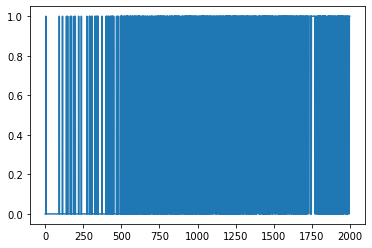

In [10]:
# 시각화
plt.plot(rList)
plt.show()

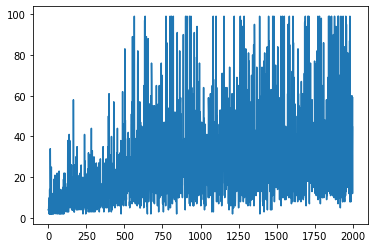

In [11]:
plt.plot(jList)
plt.show()

### 3. DQN + frozen lake 환경
코드참고링크: https://github.com/wikke/Reinforcement_Learning/blob/master/FrozenLake_DQN.py  
설명참고링크: https://www.youtube.com/watch?v=S1Y9eys2bdg&t=32s

딥러닝 적용시 생기는 문제점
- correlations between samples
- non-stationary targets  

해결방법 = DQN
- go deep: 네트워크가 깊을수록 좋다
- capture and replay: action의 state를 buffer에 저장한 후 랜덤하게 샘플링하여 학습
    - correlations between samples 해결
- seperate networks: create a target network
    - non-stationary targets 해결

In [30]:
import numpy as np
import gym
import random
# import logging
from keras.layers import Dense
from keras.models import Sequential
from gym.envs.registration import register, spec
from collections import deque
from pandas import DataFrame, Series

Using TensorFlow backend.


In [31]:
EPISODES = 2048

EPSILON = 1.0
EPSILON_DECAY = 0.95
EPSILON_MIN = 0.2

In [32]:
LEARNING_RATE = 0.01 
GAMMA = 0.9 
BATCH_SIZE = 32

In [33]:
ACTION_LEFT = 0
ACTION_DOWN = 1
ACTION_RIGHT = 2
ACTION_UP = 3
ACTION_DEFAULT = None
ACTION_TEXT = {
    ACTION_LEFT: 'left',
    ACTION_DOWN: 'down',
    ACTION_RIGHT: 'right',
    ACTION_UP: 'up'
}

In [34]:
class DQNAgent():
    def __init__(self):
        self.env = self._build_env()
        self.nb_status = self.env.observation_space.n
        self.nb_action = self.env.action_space.n

        self.memory = deque(maxlen=2048)

        self.model = self._build_model()

    def _build_env(self):
        frozen_lake = 'FrozenLakeNonSlippery4x4-v0'
        try:
            spec(frozen_lake)
        except:
            register(id=frozen_lake, entry_point='gym.envs.toy_text:FrozenLakeEnv',
                     kwargs={'map_name': '4x4', 'is_slippery': False})
        return gym.make(frozen_lake)

    def episode(self):
        status = self.env.reset()

        while True:
            # env.render()
            action = self._choose_action(status)
            next_status, reward, done, info = self.env.step(action)


            self.memory.append((status, action, reward, next_status, done))
            status = next_status

            if done:
                break


    def _choose_action(self, status, choose_best = False, return_probs = False):
        global EPSILON

        if_explore = False
        if choose_best:
            if_explore = False
        else:
            if_explore = np.random.uniform() < EPSILON

        action = ACTION_DEFAULT
        if if_explore:
            # exploration
            action = np.random.choice(self.nb_action)
        else:
            # exploitation
            reward_pred = self.model.predict(self._one_hot_status(status))[0]
            action = np.argmax(reward_pred)

        if EPSILON > EPSILON_MIN:
            EPSILON *= EPSILON_DECAY

        return action if not return_probs else (action, reward_pred)

    def replay(self):
        if len(self.memory) < BATCH_SIZE:
            return

        batches = random.sample(self.memory, BATCH_SIZE)
        X = []
        y = []
        for status, action, reward, next_status, done in batches:
            actual_reward = reward

            if not done:
                next_reward_pred = self.model.predict( self._one_hot_status(next_status))
                actual_reward += GAMMA * np.max(next_reward_pred[0])

            one_hot_status = self._one_hot_status(status)
            reward_pred = self.model.predict(one_hot_status)
            reward_pred[0][action] = actual_reward

            X.append(one_hot_status[0])
            y.append(reward_pred[0])

        self.model.train_on_batch(DataFrame(X), DataFrame(y))
        # self.model.fit(X, y, epochs=1, verbose=0)

    def demo(self):
        print("\n---------- DEMO ----------")
        decisions = []
        rewards = []
        for status in range(self.nb_status):
            best_action, reward = self._choose_action(status, choose_best=True, return_probs=True)
            decisions.append(best_action)
            rewards.append(reward)

        for i in range(self.nb_status):
            text = ''
            if i in (5,7,11,12):
                text = 'HOLE'
            elif i == 15:
                text = 'GOAL'
            else:
                text = ACTION_TEXT[decisions[i]]

            print("{0:^7}".format(text), end='')

            if (i + 1) % 4 == 0:
                print('\n')

        print('    LEFT          DOWN          RIGHT         UP')
        for r in rewards:
            print([i for i in r])

    def _one_hot_status(self, status):
        one_hot_status = np.zeros(self.nb_status)
        one_hot_status[status] = 1
        one_hot_status = np.expand_dims(one_hot_status, axis=0)
        return one_hot_status

    def _build_model(self):
        model = Sequential()
        model.add(Dense(16, input_dim=self.nb_status, activation='relu'))
        model.add(Dense(16, activation='relu'))
        model.add(Dense(self.nb_action, activation='linear'))

        model.compile(loss='mse', optimizer='adadelta')
        model.summary()

        return model


In [35]:
def main():
    agent = DQNAgent()

    for i in range(EPISODES):
        agent.episode()
        agent.replay()

        if (i+1) % 512 == 0:
            agent.demo()
            # break

In [36]:
if __name__ == '__main__':
    main()
    print('\nDone')            

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 68        
Total params: 612
Trainable params: 612
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.

---------- DEMO ----------
 right   up    right  right 

  up    HOLE   right  HOLE  

 right  down    up    HOLE  

 HOLE   right  right  GOAL  

    LEFT          DOWN          RIGHT         UP
[0.049938038, 0.046543565, 0.050800987, 0.03488608]
[0.045584954, -0.017346647, 0.036553342, 0.04772796]
[0.05472885, -0.011670787, 0.0628125

아직 이해중....

### 4. DDQN + frozen lake 환경
코드참고링크: 
설명참고링크: 

DDQN = double 

https://sumniya.tistory.com/19
https://jsideas.net/dqn/
http://khanrc.github.io/RL-DQN.html#dqn
https://jsideas.net/dqn/